<a href="https://colab.research.google.com/github/obarochris/edu-team-12/blob/main/group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

In [ ]:

df.shape

(20640, 10)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

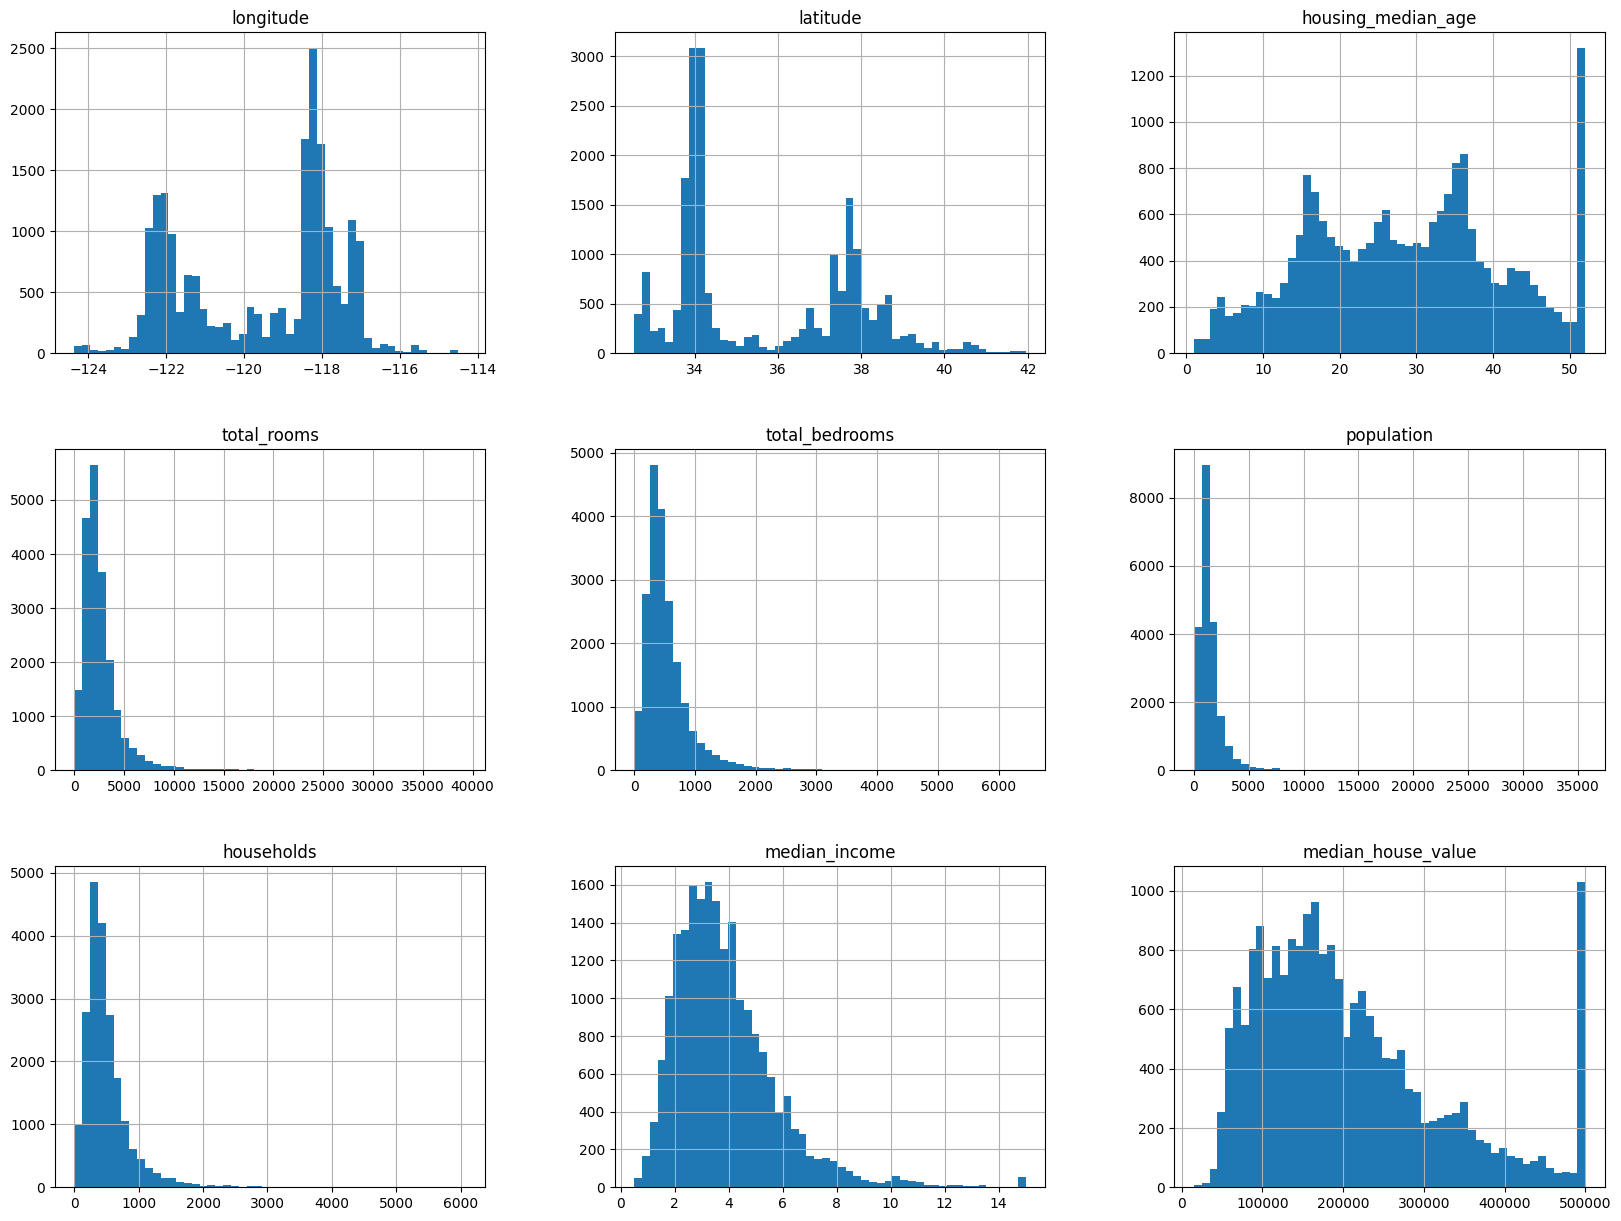

In [ ]:
df.hist(bins =50, figsize= (20,15))

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

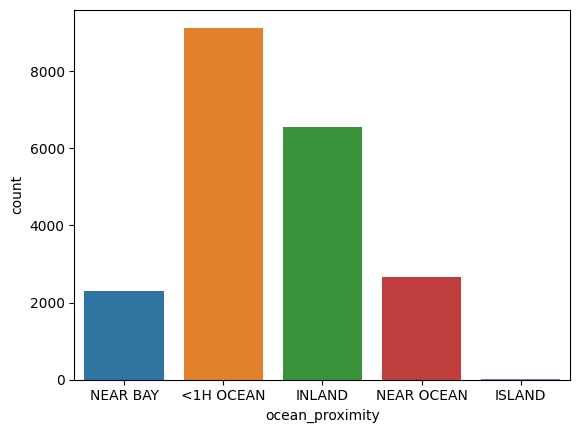

In [ ]:
sns.countplot(x='ocean_proximity',data=df)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

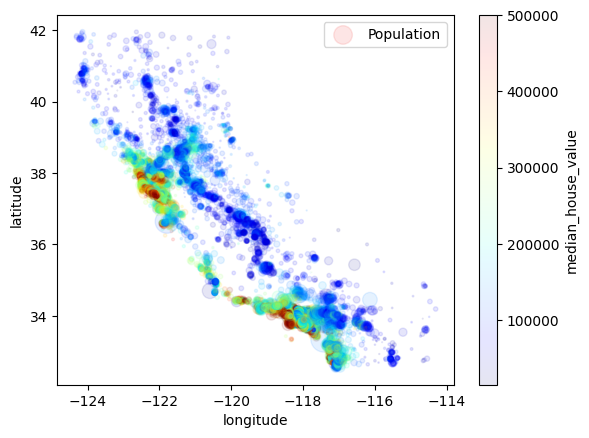

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=df['population']/100, label='Population',  c="median_house_value", cmap=plt.get_cmap("jet"))

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<ipython-input-16-3050bdc48763>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5)


<Axes: >

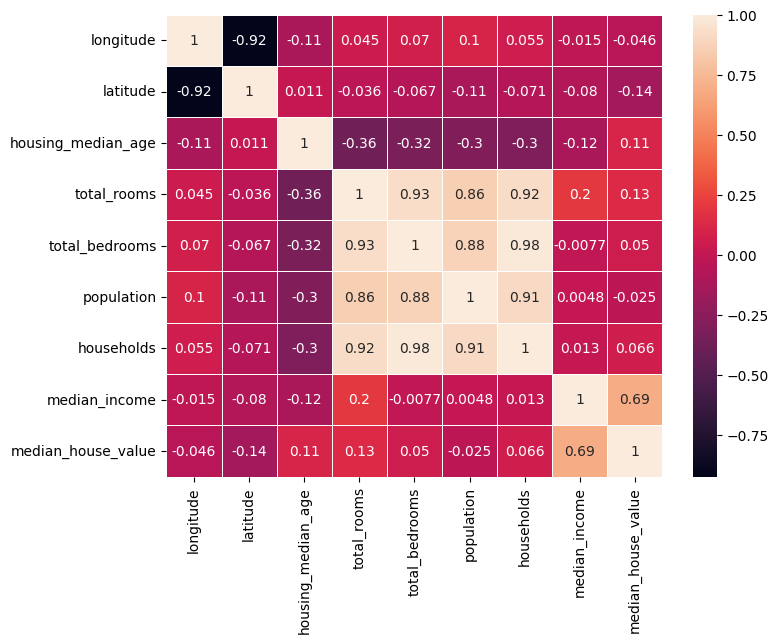

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [ ]:
corr_matrix = df.corr()

<ipython-input-17-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
df['room_per_household'] = df['total_rooms'] / df ['households']

In [ ]:
df['bedroom_per_room'] = df['total_bedrooms'] / df['total_rooms']

df['population_per_household'] = df['population'] / df['households']

In [ ]:
df.shape

(20640, 13)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedroom_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [ ]:
df.na = df.dropna(subset = ['total_bedrooms'])

<ipython-input-23-1af11eccb2b6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.na = df.dropna(subset = ['total_bedrooms'])


In [ ]:
df.na.shape

(20433, 13)

In [ ]:
dummies = pd.get_dummies(df.na.ocean_proximity)

In [ ]:
df.na.dummies = pd.concat([df.na, dummies], axis ='columns')

<ipython-input-26-e129af2665c3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.na.dummies = pd.concat([df.na, dummies], axis ='columns')


In [ ]:
df.na.dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,bedroom_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0,1,0,0,0


In [ ]:
df.clean = df.na.dummies.drop(['ocean_proximity', 'ISLAND'], axis = 'columns')

<ipython-input-28-041e5d836b5e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.clean = df.na.dummies.drop(['ocean_proximity', 'ISLAND'], axis = 'columns')


In [ ]:
df.clean.shape

(20433, 16)

In [ ]:
df.clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedroom_per_room,population_per_household,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean.drop('median_house_value', axis=1), df.clean['median_house_value'], test_size=0.2, random_state=42)

In [ ]:
X = df.clean.drop('median_house_value', axis=1)
Y = df.clean['median_house_value']

In [ ]:
# Fit a multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Intercept: \n",regressor.intercept_)
print("Coefficients: \n",regressor.coef_)

Intercept: 
 -2292673.5713406107
Coefficients: 
 [-2.83699142e+04 -2.67585959e+04  1.10318917e+03  2.32628703e+00
  1.24951724e+01 -3.89078003e+01  1.01603790e+02  4.11930802e+04
  3.42131607e+03  2.91260241e+05  6.10267793e+01 -2.08268434e+05
 -2.42590862e+05 -2.14730562e+05 -2.05398426e+05]


In [ ]:
y_pred

array([268050.97 , 156899.4  , 120425.086, ..., 108710.125, 327403.88 ,
       139164.58 ], dtype=float32)

In [ ]:
print(reg.score(X_train, y_train))

0.6536916195772899


In [ ]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 0.651
MSE: 4766908188.849
RMSE: 69042.800
MAE: 49774.505


<Axes: >

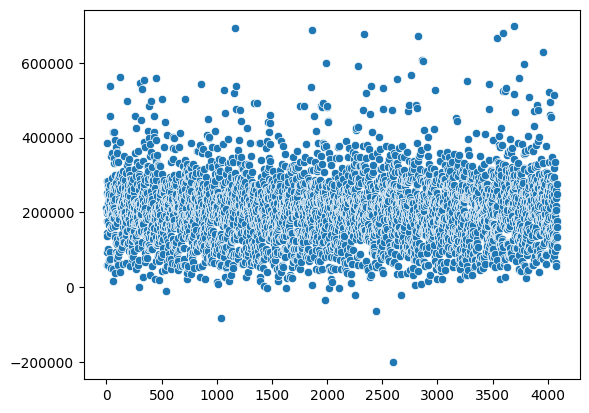

In [ ]:
sns.scatterplot(y_pred)

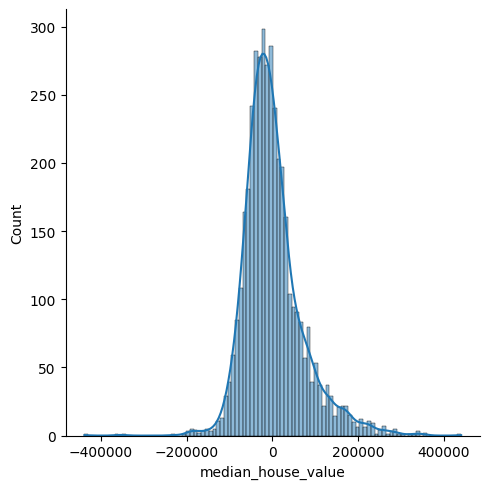

In [ ]:
error = y_test - y_pred
sns.displot(error, kde=True)

Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean.drop('median_house_value', axis=1), df.clean['median_house_value'], test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
#print('Test MSE score:', (sqrt(mean_squared_error(y_test, y_pred)))
#print('Test MSE score:', mean_squared_error(y_test, y_pred)))

Test R2 score: 0.9357695663164441
Test MSE score: 875955982.2994467


longitude                   0.058941
latitude                    0.056368
housing_median_age          0.044308
total_rooms                 0.012929
total_bedrooms              0.011462
population                  0.012277
households                  0.010352
median_income               0.477717
room_per_household          0.026430
bedroom_per_room            0.024657
population_per_household    0.120935
<1H OCEAN                   0.001224
INLAND                      0.138968
NEAR BAY                    0.000882
NEAR OCEAN                  0.002550
dtype: float64


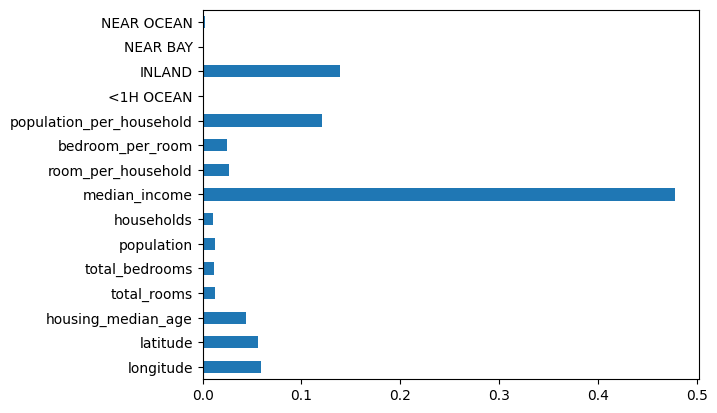

In [ ]:
# Obtain the feature importances and plot them
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

Define the RF model with OOB, fit the RF model using the train data, evaluate the OOB scores, and plot the feature importance



OOB R2 score: 0.8116735460213694
OOB MSE score: 2492854378.1409783
longitude                   0.058941
latitude                    0.056368
housing_median_age          0.044308
total_rooms                 0.012929
total_bedrooms              0.011462
population                  0.012277
households                  0.010352
median_income               0.477717
room_per_household          0.026430
bedroom_per_room            0.024657
population_per_household    0.120935
<1H OCEAN                   0.001224
INLAND                      0.138968
NEAR BAY                    0.000882
NEAR OCEAN                  0.002550
dtype: float64


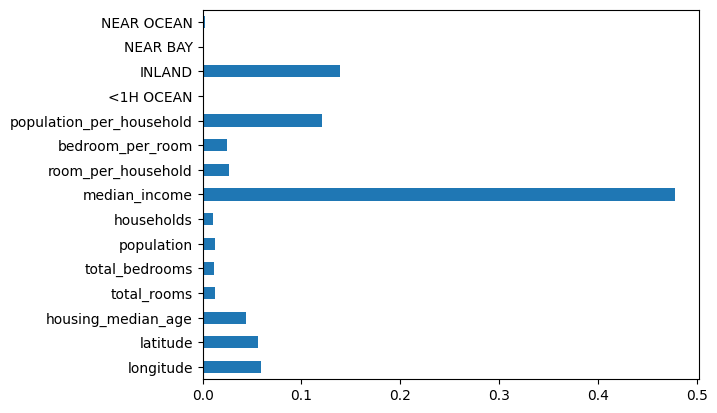

In [ ]:

# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 40]
   # ,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
print(scoring)

{'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


In [ ]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [5, 10, 15, 40]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [ ]:
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
     

Test R2 score: 0.8108546745033509
Test MSE score: 2586596521.0027018


In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 40}
Best R2 score: 0.8067934699255727
Best MSE score: 2552714547.847743


longitude                   0.058530
latitude                    0.056598
housing_median_age          0.044635
total_rooms                 0.012991
total_bedrooms              0.011127
population                  0.012123
households                  0.010787
median_income               0.477497
room_per_household          0.026720
bedroom_per_room            0.024625
population_per_household    0.121049
<1H OCEAN                   0.001257
INLAND                      0.138463
NEAR BAY                    0.000859
NEAR OCEAN                  0.002740
dtype: float64


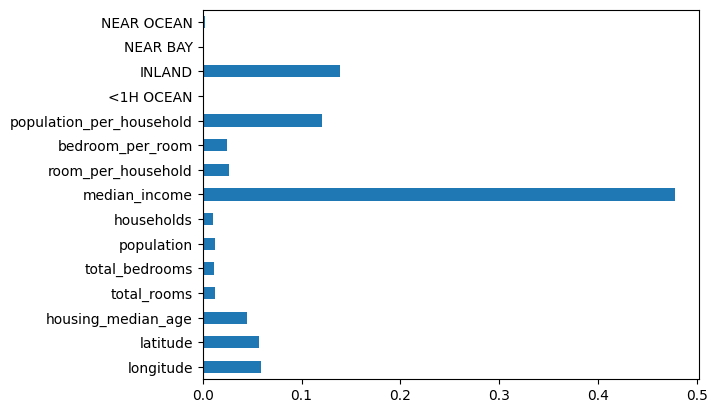

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
#from sklearn.tree import plot_tree

#fig, ax = plt.subplots(figsize=(16, 8))
#plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
#plt.show()

Support vector machine

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean.drop('median_house_value', axis=1), df.clean['median_house_value'], test_size=0.2, random_state=50)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier = svm.SVC()

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

In [ ]:

grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

K Nearest neighbout KNN

0.457474460901929
75113.89681568736


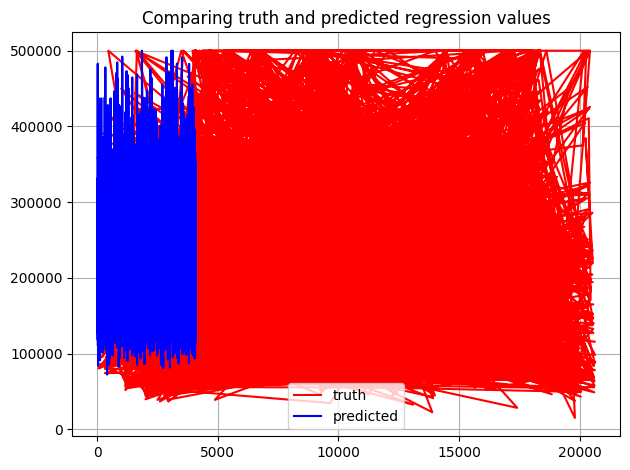

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train, y_train)
knn_predicted = neigh.predict(X_test)
print(neigh.score(X_train, y_train))
print(mean_absolute_error(y_test, knn_predicted))
make_plot(y_test, knn_predicted)

Artificial Neural Networks

In [ ]:
!pip install scikeras
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# create the model
model = KerasRegressor(build_fn=create_model, verbose=0)
print(model)

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x7f6f4db2dcf0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)


In [ ]:
# define the grid search parameters
param_grid = {'batch_size': [32, 64],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd']}

# perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
 
# print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Best Parameters: {'batch_size': 32, 'epochs': 100, 'optimizer': 'sgd'}


In [ ]:

best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Y predict on X test set
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4390262826.44262
R-squared: 0.6780791603398115


longitude: 283711.1875
latitude: 283582.53125
total_rooms: 272633.71875
INLAND: 246207.234375
housing_median_age: 244340.234375
<1H OCEAN: 223228.453125
NEAR BAY: 221316.421875
room_per_household: 220996.171875
households: 216451.015625
total_bedrooms: 185158.28125
population_per_household: 179062.703125
NEAR OCEAN: 160718.09375
population: 112384.9921875
median_income: 100290.640625
bedroom_per_room: 84554.9296875


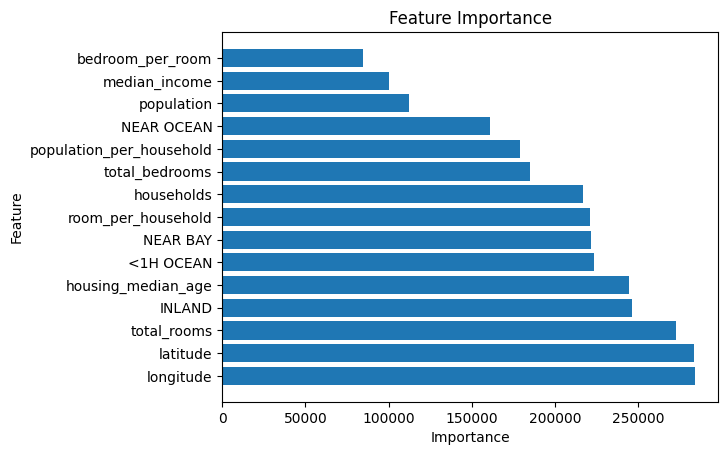

In [ ]:
importance = best_model.predict(X_train, verbose=0)
importance = np.squeeze(importance)
feature_names = X_train.columns
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda kv: abs(kv[1]), reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {abs(importance)}")

importance_values = [abs(kv[1]) for kv in sorted_importance]
#print(importance_values)
feature_names = [kv[0] for kv in sorted_importance]
#print(feature_names)

plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Let's plot the mean absolute error of all the algorithms we have tried
lin_mae = mean_absolute_error(y_test, predicted)
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [lin_mae, knn_mae, rf_mae, xgb_mae]
labels = ["LinearReg", "KNNReg", "RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")